Аскеров Руслан НПИбд-01-17 Лабораторная 1, Вариант 2.

1) Используя функционал библиотеки NumPy, постройте  𝑛  значений случайных признаков  𝑋  и  𝑌 , имеющих (двумерное) гауссовское распределение с математическим ожиданием  𝑎  и корреляционной матрицей  𝑅 .

n = 1000, a = [-1., 0.], R = [[1., 0.9], [0.9, 2.]]

(-4.238314828244195, 3.002020675542182, -4.819954574017112, 5.352659143980268)

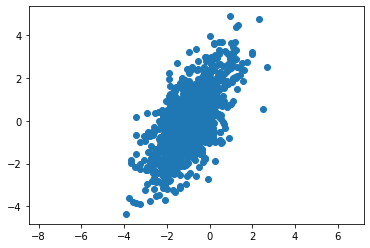

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mean = [-1., 0.]
cov = [[1., 0.9], [0.9, 2.]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T

plt.plot(x, y, 'o') # marker 'o'
plt.axis('equal') # to equalize the scales of axis

2) Вычислите и выведите на экран для построенных значений признаков  𝑋  и  𝑌  математические ожидания  𝜇𝑋 ,  𝜇𝑌 , дисперсии  𝜎2𝑋 ,  𝜎2𝑌 , а также корреляцию между признаками  𝜌𝑋,𝑌 .

3) Визуализируйте построенные данные  {𝑥𝑖}𝑛𝑖=1  и  {𝑦𝑖}𝑛𝑖=1  на плоскости в виде точек с координатами  {(𝑥𝑖,𝑦𝑖)}𝑛𝑖=1 . Визуализируйте математическое ожидание  (𝜇𝑋,𝜇𝑌)  на плоскости в виде точки другого цвета и с другим маркером.

Mean:
x = -0.9695218397612846
y = 0.01047202037075661

Disperse:
x = 0.9623151369253566
y = 1.9824684134126704

Correlation:
[[1.         0.62036973]
 [0.62036973 1.        ]]




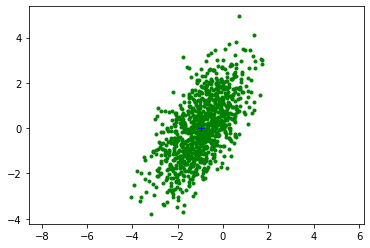

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


def main():
    result = ""

    n = 1000
    a_wait = [-1., 0.]
    r_corr = [[1., 0.9], [0.9, 2.]]
    x, y = np.random.multivariate_normal(a_wait, r_corr, n).T

    result += "Mean:\n" \
              "x = " + str(np.mean(x)) + "\n" + \
              "y = " + str(np.mean(y)) + "\n\n"
    result += "Disperse:\n" \
              "x = " + str(np.var(x)) + "\n" + \
              "y = " + str(np.var(y)) + "\n\n"
    result += "Correlation:\n" + \
              str(np.corrcoef(x, y)) + "\n\n"
    print(result)

    plt.plot(x, y, 'g.')
    plt.plot(np.mean(x), np.mean(y), 'b+')
    plt.axis('equal')
    # plt.show()



# Outer launch
if __name__ == '__main__':
    main()

Задание 2:
    Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI.

    Проведите исследование набора данных, выявляя числовые и категориальные признаки. Если какие-то из признаков были неправильно классифицированы как категориальные, то преобразуйте их в числовые. Если в наборе присутствуют незаполненные значений, то игнорируйте такие записи.

    Для числового признака, имеющего наибольшую дисперсию, постройте эмпирическую функцию распределения (CDF) и визуализируйте ее в виде графика на плоскости.

    Найдите числовой признак, наименее коррелированный с числовым признаком, имеющим наибольшую дисперсию.

    Для этого признака постройте эмпирическую плотность распределения (PDF) и визуализируйте ее в виде гистограммы.

    Вычислите и выведите на экран для указанных выше двух признаков математические ожидания, дисперсии, а также корреляцию между признаками.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V0      32561 non-null  int64 
 1   V1      32561 non-null  object
 2   V2      32561 non-null  int64 
 3   V3      32561 non-null  object
 4   V4      32561 non-null  int64 
 5   V5      32561 non-null  object
 6   V6      32561 non-null  object
 7   V7      32561 non-null  object
 8   V8      32561 non-null  object
 9   V9      32561 non-null  object
 10  V10     32561 non-null  int64 
 11  V11     32561 non-null  int64 
 12  V12     32561 non-null  int64 
 13  V13     32561 non-null  object
 14  V14     32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB

Data info:
None

Data summary:
                 V0            V2            V4           V10           V11  \
count  32561.000000  3.256100e+04  32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05     1

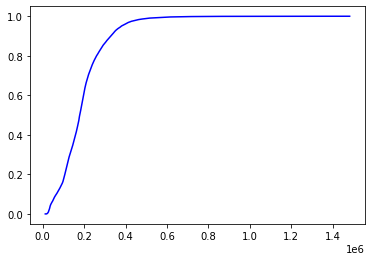

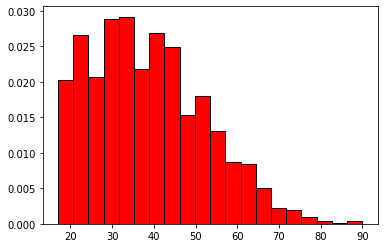

Mean:
dis = 189778.36651208502
corr = 38.58164675532078

Dispersion:
dis = 11140455640.25589
corr = 186.05568600783081

Correlation:
-0.07664586787504062




In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import re


def main():
    data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
                       header=None, prefix='V')
    result = "\n"
    result += "Data info:\n" + \
              str(data.info()) + "\n\n"
    result += "Data summary:\n" + \
              str(data.describe()) + "\n\n"
    print(result)
    dis_id = None
    dis = None
    dispersion_max = 0.0
    for i in data.columns:
        if re.match('int64|float64', str(data[i].dtype)):
            column = np.array(data[i])
            dispersion = np.var(column)
            if dispersion > dispersion_max:
                dispersion_max = dispersion
                dis_id = i
                dis = column
    x_list = [data[dis_id].min() + (data[dis_id].max() - data[dis_id].min()) * i / 500
              for i in range(0, 500)]
    y_list = [ECDF(data[dis_id], x) for x in x_list]
    plt.plot(x_list, y_list, 'b')
    plt.show()

    corr_id = None
    corr = None
    correlation_min = 100.0
    for i in data.columns:
        if re.match('int64|float64', str(data[i].dtype)):
            column = np.array(data[i])
            correlation = np.corrcoef(dis, column)[0, 1]
            if correlation < correlation_min:
                correlation_min = correlation

                corr_id = i
                corr = column
    plt.hist(data[corr_id], color='red', edgecolor='black', bins=20, density=True)
    plt.show()
    result = ""
    result += "Mean:\n" \
              "dis = " + str(np.mean(dis)) + "\n" + \
              "corr = " + str(np.mean(corr)) + "\n\n"
    result += "Dispersion:\n" \
              "dis = " + str(np.var(dis)) + "\n" + \
              "corr = " + str(np.var(corr)) + "\n\n"
    result += "Correlation:\n" + \
              str(np.corrcoef(dis, corr)[0, 1]) + "\n\n"
    print(result)


def ECDF(data, x):
    counter = 0.0
    for v in data:
        if v <= x:
            counter += 1
    return counter / len(data)


# Debugging
def check(to_check):
    print(to_check)
    print(type(to_check))


# Outer launch
if __name__ == '__main__':
    main()
